In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
import pandas as pd
file_path = "/content/drive/MyDrive/Dataset Idealista/pisos_barcelona_sin_duplicados.csv"
df = pd.read_csv(file_path, encoding='latin1')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4197 entries, 0 to 4196
Data columns (total 44 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   propertyCode            4197 non-null   int64  
 1   thumbnail               4163 non-null   object 
 2   externalReference       3565 non-null   object 
 3   numPhotos               4197 non-null   int64  
 4   floor                   3589 non-null   object 
 5   price                   4197 non-null   float64
 6   priceInfo               4197 non-null   object 
 7   propertyType            4197 non-null   object 
 8   operation               4197 non-null   object 
 9   size                    4197 non-null   float64
 10  exterior                3465 non-null   object 
 11  rooms                   4197 non-null   int64  
 12  bathrooms               4197 non-null   int64  
 13  address                 4197 non-null   object 
 14  province                4197 non-null   

In [13]:
# Convertir columnas al tipo de dato adecuado
import pandas as pd

# Convertir fechas si hay alguna en el dataset
date_columns = ['publicationDate', 'updatedAt']  # Ajustar si hay columnas de fecha en el dataset
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')

# Convertir números a enteros donde aplique
int_columns = ['numPhotos', 'rooms', 'bathrooms', 'floor']
for col in int_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce').fillna(0).astype(int)

# Convertir precios y métricas económicas a float
float_columns = ['price', 'size', 'priceByArea']
for col in float_columns:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')

# Mostrar tipos de datos después de la conversión
print(df.dtypes)


propertyCode                int64
thumbnail                  object
externalReference          object
numPhotos                   int64
floor                       int64
price                     float64
priceInfo                  object
propertyType               object
operation                  object
size                      float64
exterior                   object
rooms                       int64
bathrooms                   int64
address                    object
province                   object
municipality               object
district                   object
country                    object
neighborhood               object
latitude                  float64
longitude                 float64
showAddress                  bool
url                        object
distance                    int64
description                object
hasVideo                     bool
status                     object
newDevelopment               bool
hasLift                    object
priceByArea   

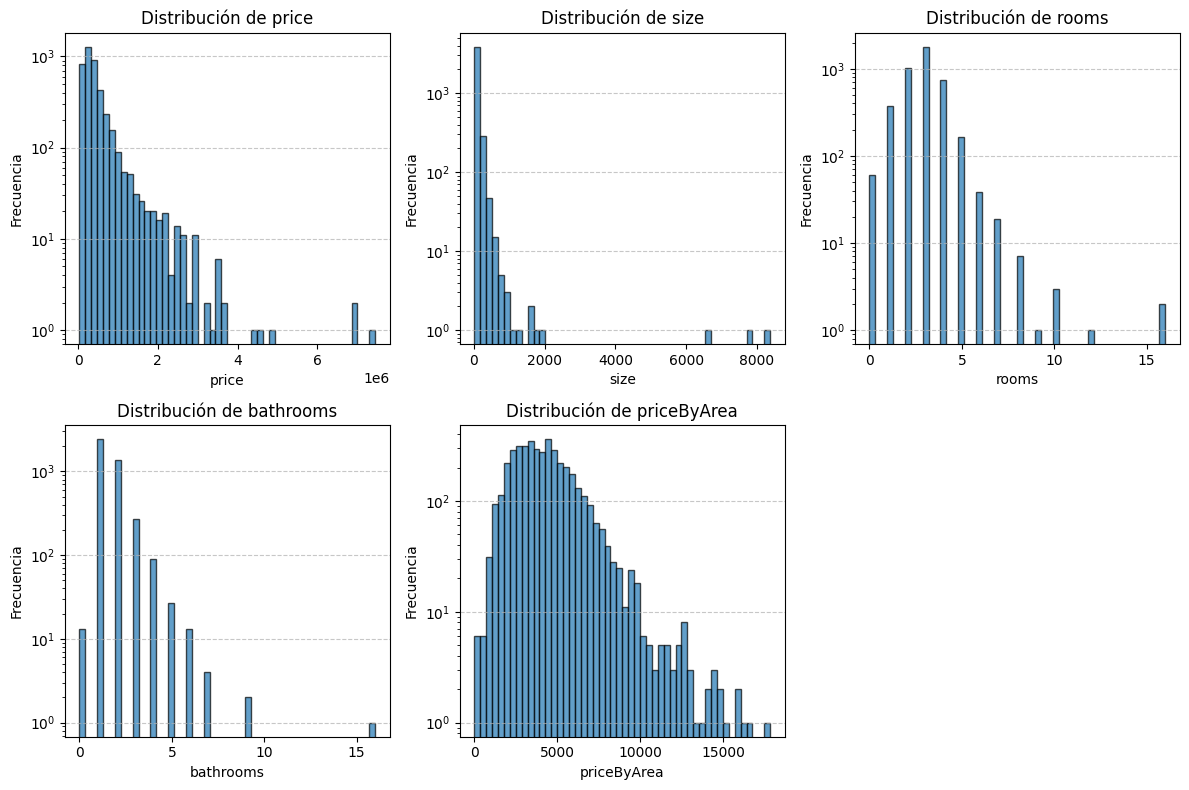

In [14]:
import matplotlib.pyplot as plt

# Seleccionar solo las columnas numéricas
numeric_columns = ['price', 'size', 'rooms', 'bathrooms', 'priceByArea']

# Crear histogramas
plt.figure(figsize=(12, 8))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col].dropna(), bins=50, edgecolor='black', alpha=0.7)
    plt.xlabel(col)
    plt.ylabel("Frecuencia")
    plt.title(f"Distribución de {col}")
    plt.yscale("log")  # Escala logarítmica para mejor visualización
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


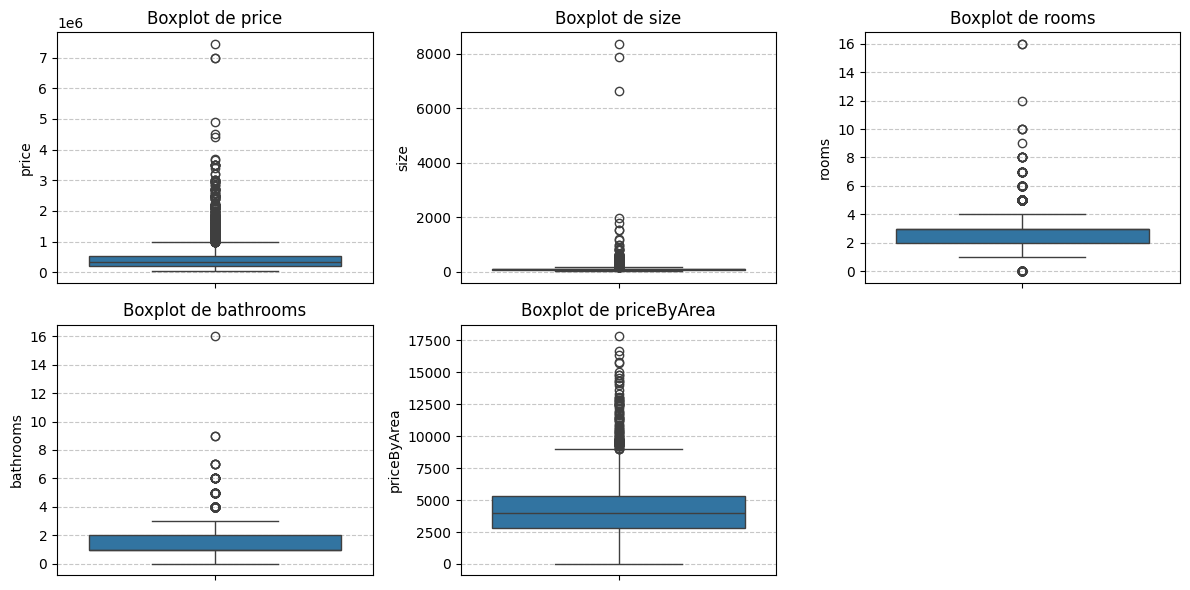

In [15]:
import seaborn as sns

plt.figure(figsize=(12, 6))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(y=df[col])
    plt.ylabel(col)
    plt.title(f"Boxplot de {col}")
    plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()


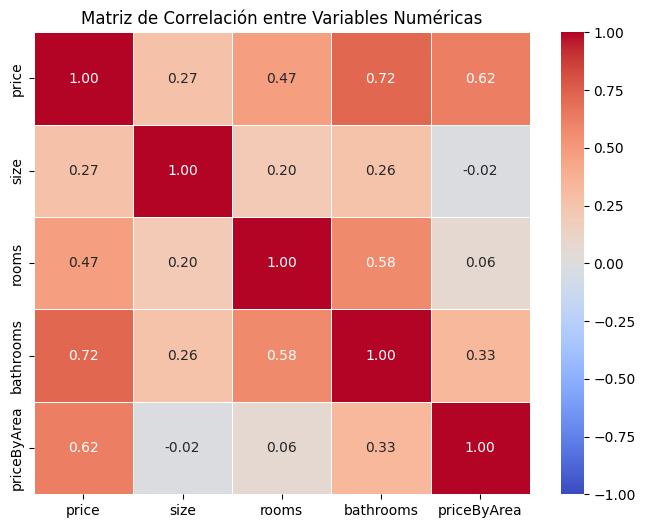

In [16]:
import seaborn as sns
import numpy as np

# Calcular la correlación
corr = df[numeric_columns].corr()

# Crear el mapa de calor
plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)
plt.title("Matriz de Correlación entre Variables Numéricas")
plt.show()


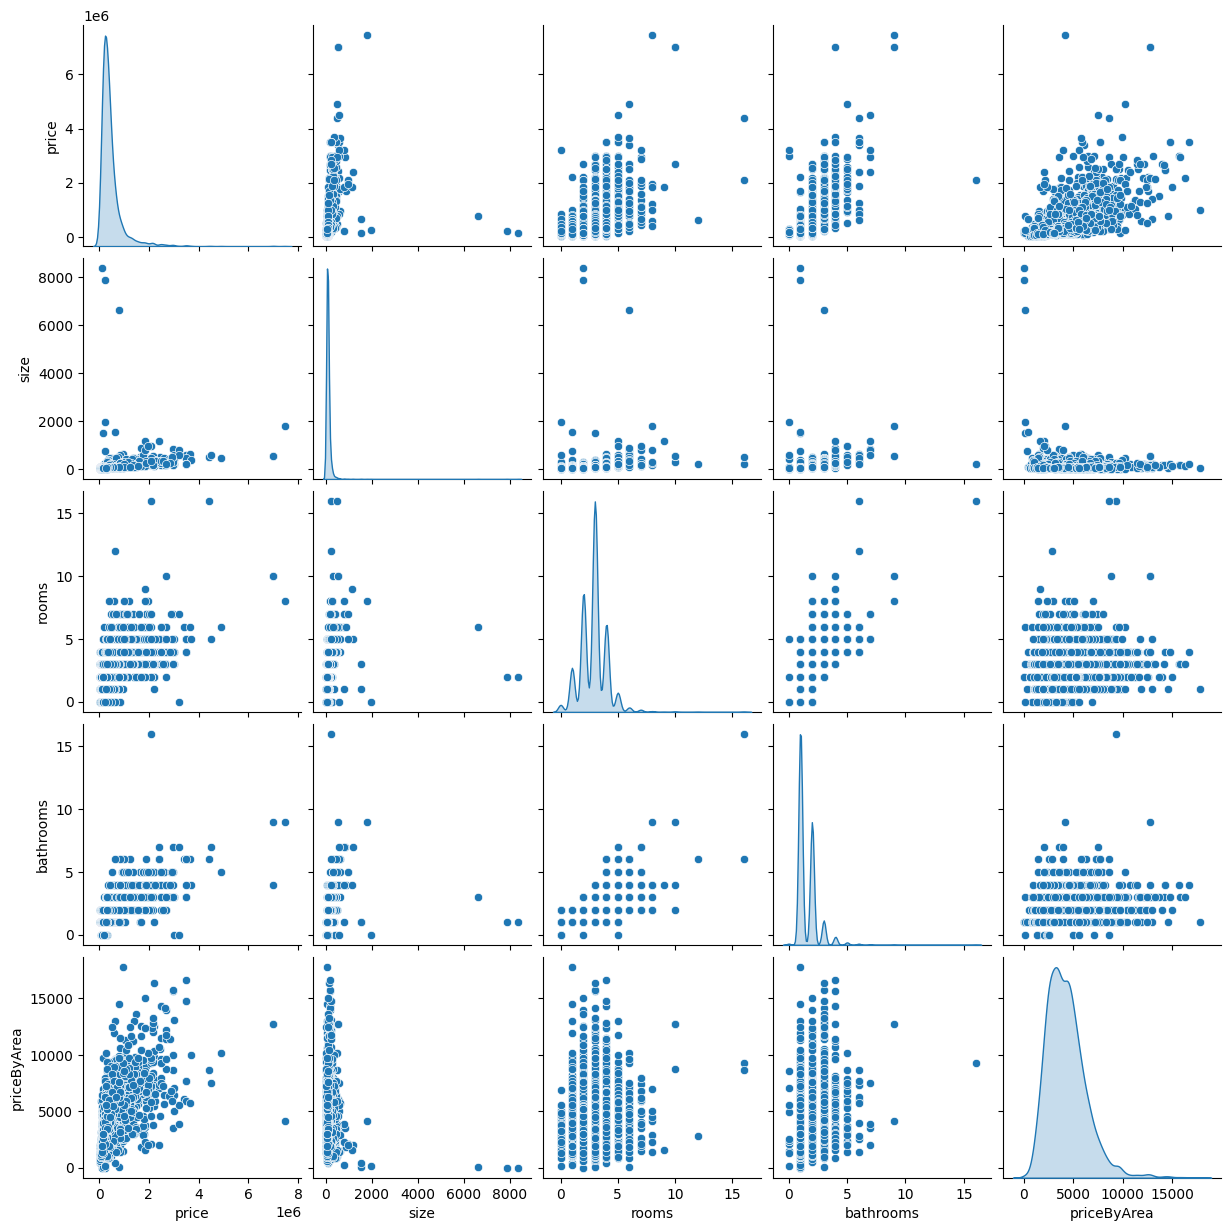

In [17]:
sns.pairplot(df[numeric_columns], diag_kind='kde')
plt.show()


In [18]:
pip install contextily

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 22.2/22.2 MB 116.6 MB/s eta 0:00:00


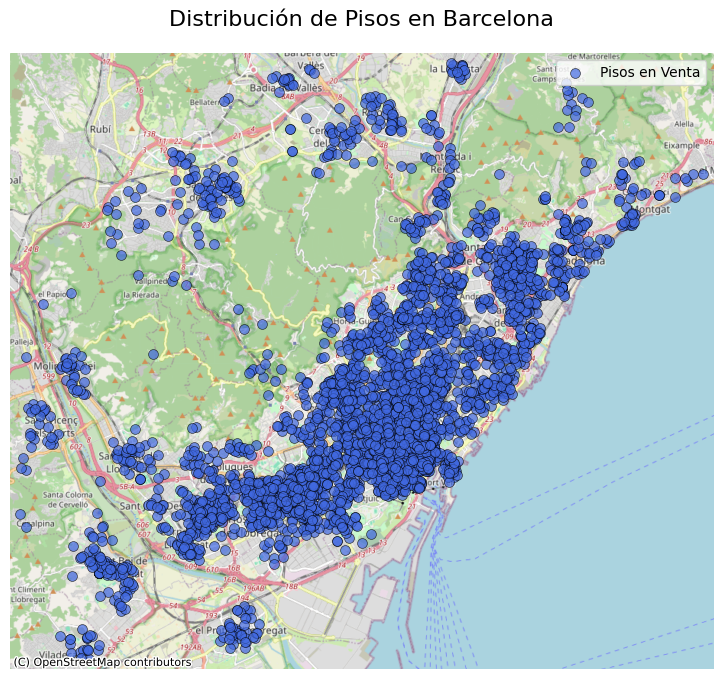

In [34]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx

# Convertir el DataFrame de pisos en un GeoDataFrame
gdf = gpd.GeoDataFrame(
    df,
    geometry=gpd.points_from_xy(df['longitude'], df['latitude']),
    crs="EPSG:4326"
)

# Convertir a sistema de coordenadas proyectadas (EPSG:3857) para trabajar con contextily
gdf = gdf.to_crs(epsg=3857)

# Crear la figura y los ejes
fig, ax = plt.subplots(figsize=(12, 8))

# Graficar los puntos con mejoras en la visualización:
# - markersize aumentado para mayor visibilidad
# - alpha ajustado para ver la superposición
# - edgecolor para resaltar cada punto
gdf.plot(
    ax=ax,
    markersize=50,
    alpha=0.7,
    color='royalblue',
    edgecolor='k',
    linewidth=0.5,
    label="Pisos en Venta"
)

# Ajustar el límite del mapa según la extensión de los datos, agregando un pequeño margen (500 unidades)
minx, miny, maxx, maxy = gdf.total_bounds
ax.set_xlim(minx - 500, maxx + 500)
ax.set_ylim(miny - 500, maxy + 500)

# Agregar el fondo de mapa de OpenStreetMap
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Para una apariencia más limpia, se pueden ocultar los ejes (opcional)
ax.set_axis_off()

# Agregar título y, si se prefiere, la leyenda (si se ocultan los ejes, la leyenda se deberá agregar manualmente)
plt.title("Distribución de Pisos en Barcelona", fontsize=16, pad=20)
plt.legend(loc="upper right")

# Mostrar el mapa
plt.show()


In [35]:
import folium
from folium.plugins import MarkerCluster

# Coordenadas centrales de Barcelona para centrar el mapa
centro_barcelona = [41.3851, 2.1734]

# Crear el mapa interactivo
mapa = folium.Map(location=centro_barcelona, zoom_start=12, tiles='OpenStreetMap')

# Crear un agrupador de marcadores para una mejor visualización
marker_cluster = MarkerCluster().add_to(mapa)

# Recorrer cada registro del DataFrame y agregar un marcador
for idx, row in df.iterrows():
    lat = row['latitude']
    lon = row['longitude']

    # Crear un popup con información del piso.
    # Puedes incluir más datos (como precio, dirección, etc.) si están disponibles en tu DataFrame.
    popup_text = f"Piso en Venta<br>Lat: {lat:.4f}<br>Lon: {lon:.4f}"

    folium.Marker(
        location=[lat, lon],
        popup=popup_text,
        icon=folium.Icon(color='blue', icon='home', prefix='fa')
    ).add_to(marker_cluster)

# Mostrar el mapa en Jupyter Notebook (o guardarlo en un archivo HTML para verlo en el navegador)
mapa.save("mapa_barcelona.html")
mapa


Output hidden; open in https://colab.research.google.com to view.

In [37]:
import plotly.express as px

# Filtrar valores nulos en coordenadas
df_filtered = df[['latitude', 'longitude']].dropna()

fig = px.density_mapbox(
    df_filtered,
    lat='latitude',
    lon='longitude',
    radius=10,  # Ajusta el radio para modificar la dispersión de la densidad
    center={'lat': 41.3851, 'lon': 2.1734},
    zoom=10,
    mapbox_style='carto-positron',
    title="Mapa de Densidad de Pisos en Barcelona"
)

fig.show()


In [31]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Copia del dataset original
df_clean = df.copy()

# 1️⃣ Seleccionar columnas numéricas relevantes
numerical_cols = [
    "size", "rooms", "bathrooms", "latitude", "longitude", "distance", "numPhotos", "priceByArea"
]

# 2️⃣ Seleccionar columnas categóricas relevantes
categorical_cols = [
    "propertyType", "operation", "floor", "exterior", "province", "municipality",
    "district", "neighborhood", "status", "hasLift", "newDevelopment"
]

# 3️⃣ Imputar valores faltantes en variables categóricas
df_clean["floor"].fillna("unknown", inplace=True)
df_clean["exterior"].fillna("unknown", inplace=True)
df_clean["hasLift"].fillna("unknown", inplace=True)
df_clean["district"].fillna("unknown", inplace=True)
df_clean["neighborhood"].fillna("unknown", inplace=True)

# 4️⃣ Aplicar One-Hot Encoding a variables categóricas
df_encoded = pd.get_dummies(df_clean[categorical_cols], drop_first=True)

# 5️⃣ Combinar con variables numéricas y la variable objetivo "price"
df_final = pd.concat([df_clean[numerical_cols], df_encoded, df_clean["price"]], axis=1)

# 6️⃣ Separar variables predictoras (X) y variable objetivo (y)
X = df_final.drop(columns=["price"])
y = df_final["price"]

# 7️⃣ Dividir en conjunto de entrenamiento y prueba (80%-20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Datos preprocesados y listos para entrenar los modelos")
print(f"Tamaño de entrenamiento: {X_train.shape}, Tamaño de prueba: {X_test.shape}")


✅ Datos preprocesados y listos para entrenar los modelos
Tamaño de entrenamiento: (3357, 259), Tamaño de prueba: (840, 259)


<ipython-input-31-aabe39d1b26f>:19: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean["floor"].fillna("unknown", inplace=True)
<ipython-input-31-aabe39d1b26f>:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try u

Regresión Lineal

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.130e+13, tolerance: 6.658e+10
  model = cd_fast.enet_coordinate_descent(


Importancia de las Variables (Agrupadas por Categoría):
           Feature     Importance
6         district  339751.227460
7     neighborhood  285212.457334
5     municipality  182414.530696
0      priceByArea  109435.568117
1        bathrooms   86244.382987
3     propertyType   61372.814418
2            rooms   41638.783024
4         distance   33126.326571
8             size   22916.508019
9        longitude   22679.144856
11         hasLift   13245.854949
10  newDevelopment    9676.637808
12          status    6163.785751
13       numPhotos    4364.569368
15        exterior    3505.376482
14        latitude    3239.665945
16           floor    2354.345924


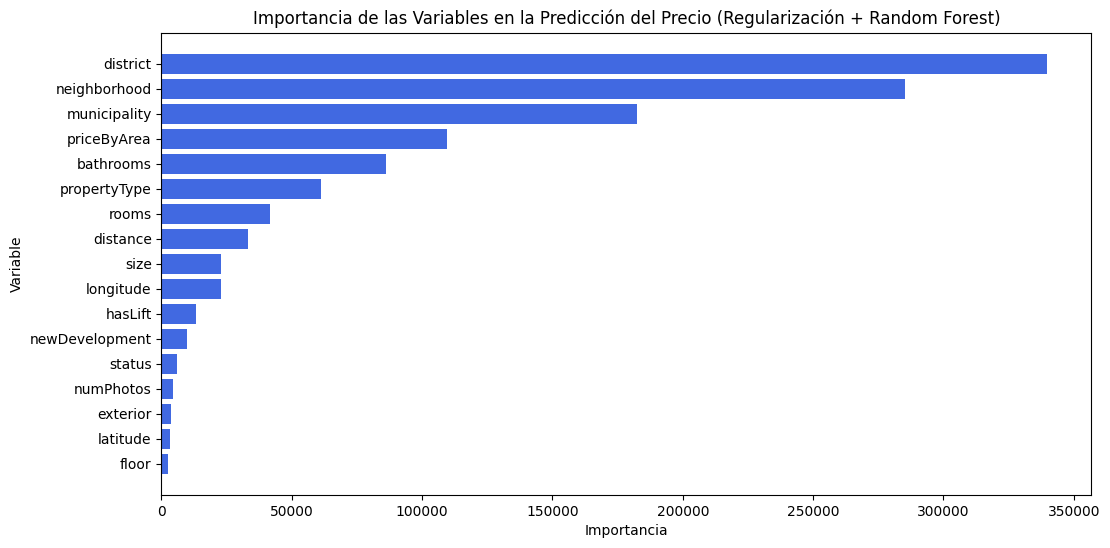

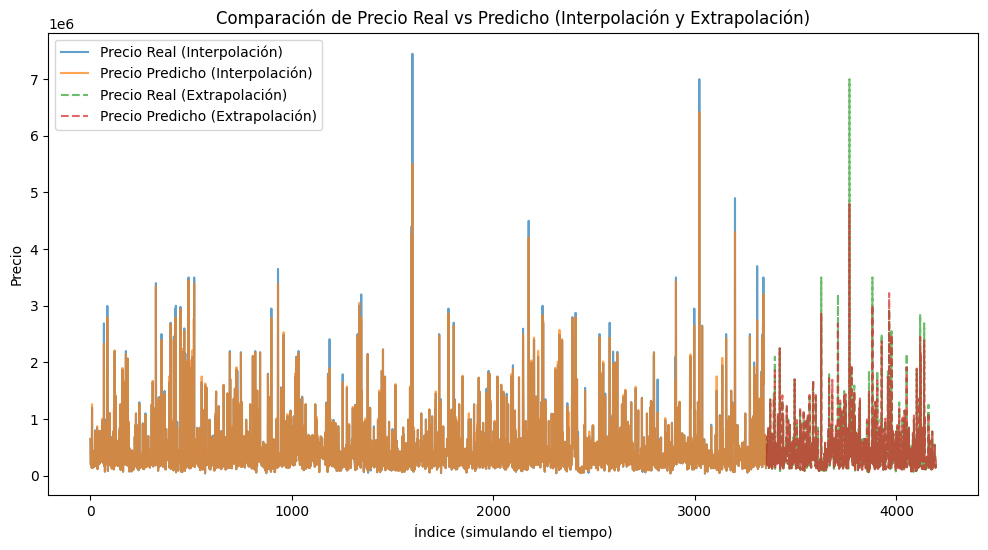

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# 1️⃣ Separar variables predictoras y variable objetivo
X = df_final.drop(columns=["price"])
y = df_final["price"]

# 2️⃣ Dividir 80% interpolación y 20% extrapolación
X_interpolation, X_extrapolation, y_interpolation, y_extrapolation = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

# 3️⃣ Dentro de la interpolación, dividir 80% train y 20% test
X_train, X_test, y_train, y_test = train_test_split(
    X_interpolation, y_interpolation, test_size=0.2, random_state=42
)

# 4️⃣ Escalar las variables numéricas (para modelos que lo requieran)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_extrapolation_scaled = scaler.transform(X_extrapolation)

# 5️⃣ Aplicar regularización con Lasso para eliminar variables irrelevantes
lasso = Lasso(alpha=0.1)  # Ajusta alpha para mayor regularización
lasso.fit(X_train_scaled, y_train)

# Obtener coeficientes de Lasso (variables más importantes)
lasso_importance = np.abs(lasso.coef_)

# 6️⃣ Entrenar modelo Random Forest para obtener importancia de características
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

rf_importance = rf_model.feature_importances_

# 7️⃣ Combinar resultados de Lasso y Random Forest en un DataFrame
feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Lasso Importance": lasso_importance,
    "Random Forest Importance": rf_importance
})

# Ordenar por la importancia promedio de ambos métodos
feature_importance_df["Mean Importance"] = (
    feature_importance_df["Lasso Importance"] + feature_importance_df["Random Forest Importance"]
) / 2

feature_importance_df = feature_importance_df.sort_values(by="Mean Importance", ascending=False)

# 8️⃣ Agrupar variables categóricas transformadas con One-Hot Encoding
categorical_original = ["propertyType", "operation", "floor", "exterior", "province", "municipality",
                         "district", "neighborhood", "status", "hasLift", "newDevelopment"]

feature_importance_grouped = {}

for feature, importance in zip(feature_importance_df["Feature"], feature_importance_df["Mean Importance"]):
    base_feature = feature.split("_")[0]  # Obtener la parte base antes del One-Hot Encoding
    if base_feature in categorical_original:
        if base_feature in feature_importance_grouped:
            feature_importance_grouped[base_feature] += importance
        else:
            feature_importance_grouped[base_feature] = importance
    else:
        feature_importance_grouped[feature] = importance  # Mantener variables numéricas sin cambios

# Convertir a DataFrame ordenado
feature_importance_grouped_df = pd.DataFrame(
    list(feature_importance_grouped.items()), columns=["Feature", "Importance"]
).sort_values(by="Importance", ascending=False)

# 9️⃣ Mostrar la importancia de cada variable agrupada
print("Importancia de las Variables (Agrupadas por Categoría):")
print(feature_importance_grouped_df)

# 📊  🔟 Graficar la importancia de las variables agrupadas
plt.figure(figsize=(12,6))
plt.barh(feature_importance_grouped_df["Feature"], feature_importance_grouped_df["Importance"], color='royalblue')
plt.xlabel("Importancia")
plt.ylabel("Variable")
plt.title("Importancia de las Variables en la Predicción del Precio (Regularización + Random Forest)")
plt.gca().invert_yaxis()  # Invertir el eje para mostrar la variable más importante arriba
plt.show()

# 📉 Graficar comparación de precios reales vs predichos
plt.figure(figsize=(12,6))
plt.plot(df_final.index[:len(y_interpolation)], y_interpolation, label="Precio Real (Interpolación)", alpha=0.7)
plt.plot(df_final.index[:len(y_interpolation)], model.predict(scaler.transform(X_interpolation)), label="Precio Predicho (Interpolación)", alpha=0.7)
plt.plot(df_final.index[len(y_interpolation):], y_extrapolation, label="Precio Real (Extrapolación)", alpha=0.7, linestyle='dashed')
plt.plot(df_final.index[len(y_interpolation):], y_extrapolation_pred, label="Precio Predicho (Extrapolación)", alpha=0.7, linestyle='dashed')
plt.xlabel("Índice (simulando el tiempo)")
plt.ylabel("Precio")
plt.legend()
plt.title("Comparación de Precio Real vs Predicho (Interpolación y Extrapolación)")
plt.show()



In [33]:
# 📈 Predicciones
y_test_pred = rf_model.predict(X_test_scaled)
y_extrapolation_pred = rf_model.predict(X_extrapolation_scaled)

# 📊 Métricas para conjunto de test (Interpolación)
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_test_pred)

# 📊 Métricas para conjunto de extrapolación
mse_extra = mean_squared_error(y_extrapolation, y_extrapolation_pred)
rmse_extra = np.sqrt(mse_extra)
r2_extra = r2_score(y_extrapolation, y_extrapolation_pred)

# 📢 Imprimir resultados
print("📊 Métricas de Evaluación:")
print(f"🔹 Test (Interpolación): MSE = {mse_test:.2f}, RMSE = {rmse_test:.2f}, R² = {r2_test:.4f}")
print(f"🔹 Extrapolación:        MSE = {mse_extra:.2f}, RMSE = {rmse_extra:.2f}, R² = {r2_extra:.4f}")


📊 Métricas de Evaluación:
🔹 Test (Interpolación): MSE = 3622451395.77, RMSE = 60186.80, R² = 0.9830
🔹 Extrapolación:        MSE = 8747507655.90, RMSE = 93528.11, R² = 0.9612
